[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mifumo081a/py_stats/blob/main/examples/notebooks/partial_corr.ipynb)


In [2]:
!git clone https://github.com/mifumo081a/py_stats.git
!ls

Cloning into 'py_stats'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 11 (delta 0), reused 11 (delta 0), pack-reused 0
Unpacking objects: 100% (11/11), done.
py_stats  sample_data


In [3]:
!pip install -r py_stats/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from py_stats import corr, pcorr

In [5]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
iris = datasets.load_iris()
df = pd.DataFrame(np.hstack([iris.data, iris.target.reshape(-1, 1)]),
                  columns=iris.feature_names + ["label"])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [7]:
corr_df, *_ = corr(df)

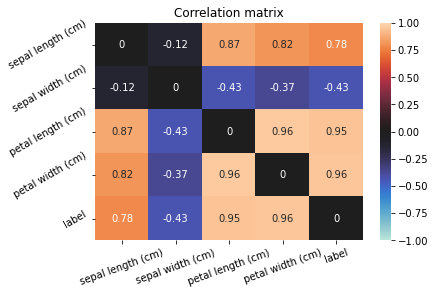

In [14]:
plt.figure()
plt.title("Correlation matrix")
g = sns.heatmap(corr_df, annot=True, vmin=-1, vmax=1, center=0)
g.set_xticklabels(g.get_xticklabels(), rotation=20)
g.set_yticklabels(g.get_yticklabels(), rotation=30)
plt.show()

### 偏相関行列，p値行列，偏相関とp値の両方(下三角：偏相関係数，上三角：p値)を出力

In [9]:
pcorr_df, pval_df, mixed_corr = pcorr(df)

8.935410118879744e-05
True
True


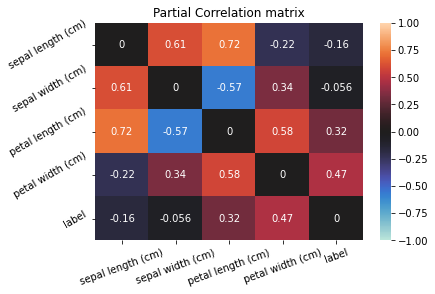

In [15]:
plt.figure()
plt.title("Partial Correlation matrix")
g = sns.heatmap(pcorr_df, annot=True, vmin=-1, vmax=1, center=0)
g.set_xticklabels(g.get_xticklabels(), rotation=20)
g.set_yticklabels(g.get_yticklabels(), rotation=30)
plt.show()

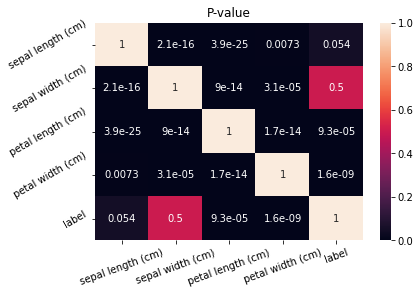

In [16]:
plt.figure()
plt.title("P-value")
g = sns.heatmap(pval_df, annot=True, vmin=0, vmax=1)
g.set_xticklabels(g.get_xticklabels(), rotation=20)
g.set_yticklabels(g.get_yticklabels(), rotation=30)
plt.show()

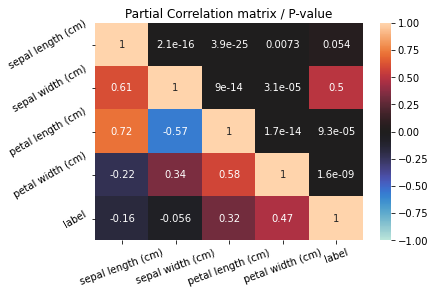

In [17]:
plt.figure()
plt.title("Partial Correlation matrix / P-value")
g = sns.heatmap(mixed_corr, annot=True, vmin=-1, vmax=1, center=0)
g.set_xticklabels(g.get_xticklabels(), rotation=20)
g.set_yticklabels(g.get_yticklabels(), rotation=30)
plt.show()

### 独立グラフ

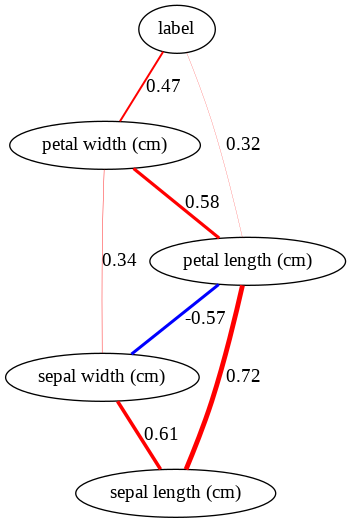

In [22]:
from graphviz import Graph
from PIL import Image

def draw_graph(cm, threshold):
    edges = np.where(np.abs(cm) > threshold)
    edges = [[cm.index[i], cm.index[j]] for i, j in zip(edges[0], edges[1]) if i > j]

    g = Graph(format='png')
    g.attr(rankdir="BT", size="12.0")
    for k in range(cm.shape[0]):
        g.node(cm.index[k])

    for i, j in edges:
        val = cm.at[i, j]
        line_width = 6 * (abs(val) - threshold) / (1 - threshold)
        h, s, v = 0.0 if val > 0 else 2 / 3, abs(val)*5, 1.0 
        color = ' '.join([str(a) for a in (h, s, v)])
        g.attr("edge", color=color, penwidth=str(line_width))
        g.edge(j, i, label="{:.2f}".format(val))

    g.render(filename='./test', format='png', cleanup=True, directory=None)
    display(Image.open('./test.png'))

threshold = 0.3
draw_graph(pcorr_df, threshold)